In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
import pandas as pd

In [15]:
x, y = make_moons(n_samples=1000, noise=0.2)


In [16]:
df = { "data1":x[:,0],"data2":x[:,1],"y" : y}

In [17]:
datasets=pd.DataFrame(df)

In [18]:
datasets

,data1,data2,y
0,0.052013,0.392306,1
1,1.075258,-0.236967,1
2,-1.375071,0.074154,0
3,-0.096728,1.125136,0
4,-1.027291,-0.131876,0
...,...,...,...
995,0.093155,1.027830,0
996,0.751453,-0.392864,1
997,-0.118030,0.998982,0
998,0.570775,-0.327202,1


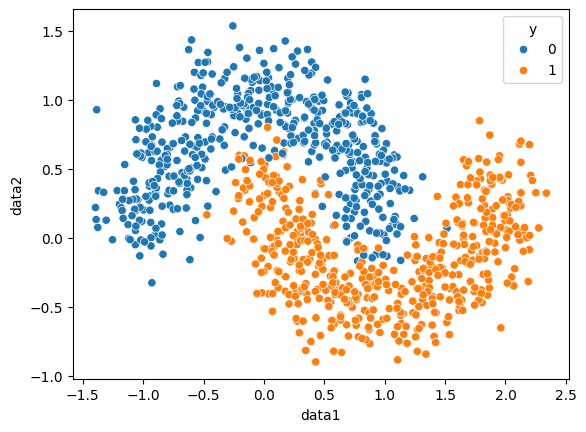

In [19]:
sns.scatterplot(x="data1",y="data2",data=datasets,hue="y")
plt.show()

In [20]:
x_a=datasets.iloc[:,:-1]
y_a=datasets["y"]

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x_a,y_a,test_size=0.2,random_state=42)

In [24]:
from sklearn.tree  import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [25]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100 , dt.score(x_test,y_test)*100

(100.0, 96.0)

In [26]:
sv=SVC()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)*100 , sv.score(x_test,y_test)*100

(96.625, 98.5)

In [27]:
gb=GaussianNB()
gb.fit(x_train,y_train)
gb.score(x_train,y_train)*100 , gb.score(x_test,y_test)*100

(86.625, 87.5)

In [28]:
from sklearn.ensemble import VotingClassifier

In [30]:
li = [("dt1", DecisionTreeClassifier()), ("sv1", SVC()), ("gb", GaussianNB())]

In [33]:
vc=VotingClassifier(li)
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('sv1', SVC()),
                             ('gb', GaussianNB())])

In [35]:
vc.score(x_train,y_train)*100 , vc.score(x_test,y_test)*100

(97.25, 97.5)

In [43]:
pre = {"dt": dt.predict(x_test), "sv": sv.predict(x_test), "gb": gb.predict(x_test), "vc": vc.predict(x_test)}


In [44]:
pd.DataFrame(pre)

,dt,sv,gb,vc
0,1,1,1,1
1,0,0,0,0
2,1,1,1,1
3,1,1,1,1
4,0,0,0,0
...,...,...,...,...
195,1,1,1,1
196,0,1,1,1
197,0,0,0,0
198,0,0,0,0
